<a href="https://colab.research.google.com/github/VoTanThinh/googlecolab/blob/main/ROBOTTRANHVATCANfuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=ed144fb93b417f61753bcdb2eaea6785293ca10e4a930ae4d420466e041eb4da
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-33-9d29f4cf1e25>:75: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-33-9d29f4cf1e25>:76: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-33-9d29f4cf1e25>:77: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)


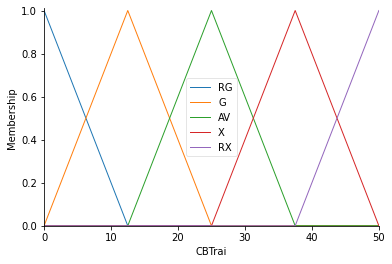

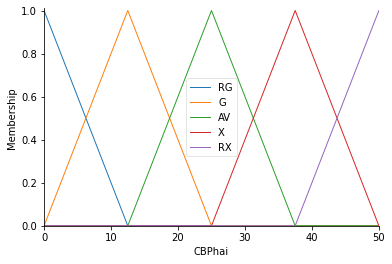

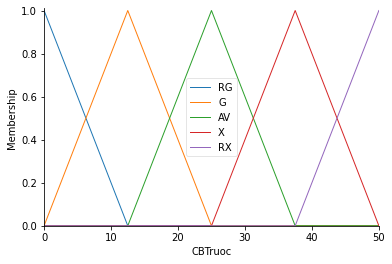

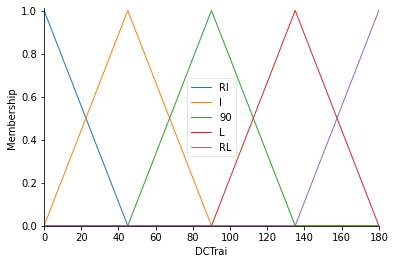

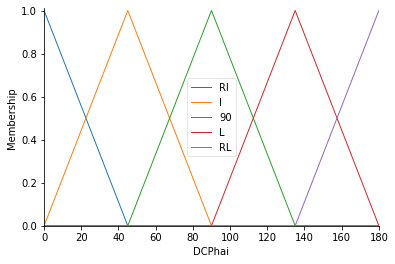

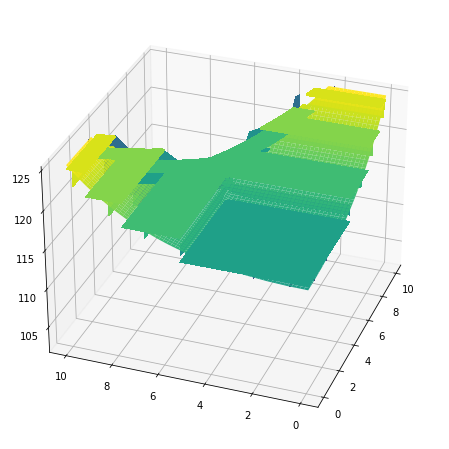

In [33]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

CBTrai = np.linspace(0,50,61) # chia khoang 0-10 thanhf 61 phaanf thuw
CBPhai= np.linspace(0,50,61)
CBTruoc= np.linspace(0,50,61)

DCTrai= np.linspace(0,180,61)
DCPhai= np.linspace(0,180,61)

CBTrai= ctrl.Antecedent(CBTrai,'CBTrai')
CBPhai= ctrl.Antecedent(CBPhai,'CBPhai')
CBTruoc= ctrl.Antecedent(CBTruoc,'CBTruoc')

DCTrai = ctrl.Consequent(DCTrai,'DCTrai')
DCPhai = ctrl.Consequent(DCPhai,'DCPhai')

names1 = ['RG','G','AV','X','RX'] # gia tri phai laf ler 
names2 = ['RI','I','90','L','RL']

CBTrai.automf(names=names1) # chia khoan cho tung bieeur ddofo teen dg bieu do
CBPhai.automf(names=names1)
CBTruoc.automf(names=names1)
DCTrai.automf(names=names2)
DCPhai.automf(names=names2)

CBTrai.view()
CBPhai.view()
CBTruoc.view()
DCTrai.view()
DCPhai.view()

rule0 = ctrl.Rule(antecedent=((CBTrai['RG']&CBTruoc['RX'])|(CBTrai['X']&CBTruoc['X'])|(CBTrai['X']&CBTruoc['RX'])
|(CBTrai['RX']&CBTruoc['X'])|(CBTrai['RX']&CBTruoc['RX'])),consequent=DCTrai['RI'], label= 'rule RI') 

rule1 = ctrl.Rule(antecedent=((CBTrai['RG']&CBTruoc['X'])|(CBTrai['G']&CBTruoc['X'])|(CBTrai['G']&CBTruoc['RX'])
|(CBTrai['AV']&CBTruoc['X'])|(CBTrai['AV']&CBTruoc['RX'])),consequent=DCTrai['I'], label= 'rule I') 

rule2 = ctrl.Rule(antecedent=((CBTrai['RG']&CBTruoc['RG'])|(CBTrai['G']&CBTruoc['G'])|(CBTrai['AV']&CBTruoc['RG'])
|(CBTrai['X']&CBTruoc['G'])|(CBTrai['X']&CBTruoc['AV'])|(CBTrai['RX']&CBTruoc['AV'])),consequent=DCTrai['90'], label= 'rule 90') 

rule3 = ctrl.Rule(antecedent=((CBTrai['RG']&CBTruoc['G'])|(CBTrai['G']&CBTruoc['RG'])|(CBTrai['G']&CBTruoc['AV'])
|(CBTrai['AV']&CBTruoc['G'])|(CBTrai['X']&CBTruoc['RG'])|(CBTrai['RX']&CBTruoc['G'])),consequent=DCTrai['L'], label= 'rule L') 

rule4 = ctrl.Rule(antecedent=((CBTrai['RG']&CBTruoc['RG'])
),consequent=DCTrai['RL'], label= 'rule RL') 






system = ctrl.ControlSystem(rules=[rule0,rule1,rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run= 61*61+1)
upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['CBTrai'] = x[i,j]
    sim.input['CBTruoc'] = y[i,j]
    #sim.input['CBTPhai'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['DCTrai']
    #z[i,j] = sim.output['DCPhai']
#phaanf hien thi
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d') #vị trí tọa độ 1 1 1
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)




# New Section